In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import LogisticRegression, FDA

### **Loading the Data**

The given data is loaded from the `.csv` format and converted into a pandas dataframe. To verify if the data is loaded correctly, check the first five rows (head) of the dataframe. 
If this step fails, the loading of the data is incorrect.

In [2]:
# Load the data
path: str = r"Datasets\Question-2\heart.csv"
df: pd.DataFrame = pd.read_csv(path)

df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### **Preprocessing the Data**

The data is preprocessed to remove the unwanted columns. Some columns are converted to numerical values using One Hot Encoding.

In [3]:
# One Hot Encode df["ChestPain"] and df["Thal"] and drop the original columns
for col in ["typical", "asymptomatic", "nonanginal", "nontypical"]:
    df[col] = (df["ChestPain"] == col).astype(int)
df.drop("ChestPain", axis=1, inplace=True)

In [4]:
# One Hot Encode df["Thal"] and drop the column
for col in ["fixed", "normal", "reversable"]:
    df[col] = (df["Thal"] == col).astype(int)
df.drop("Thal", axis=1, inplace=True)

In [5]:
# Drop the Unnamed id column and nan rows
df.dropna(inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
# Preprocess the target column
df["Target"] = (df["AHD"] == "Yes").astype(int)
df.drop("AHD", axis=1, inplace=True)

In [7]:
# Normalize the data
outcome = df["Target"]
df.drop("Target", axis=1, inplace=True)
df = (df - df.min()) / (df.max() - df.min())
df["Target"] = outcome
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,typical,asymptomatic,nonanginal,nontypical,fixed,normal,reversable,Target
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


### **Data Anaysis**

The data is plotted on graphs to find our patterns and relationships among the features.

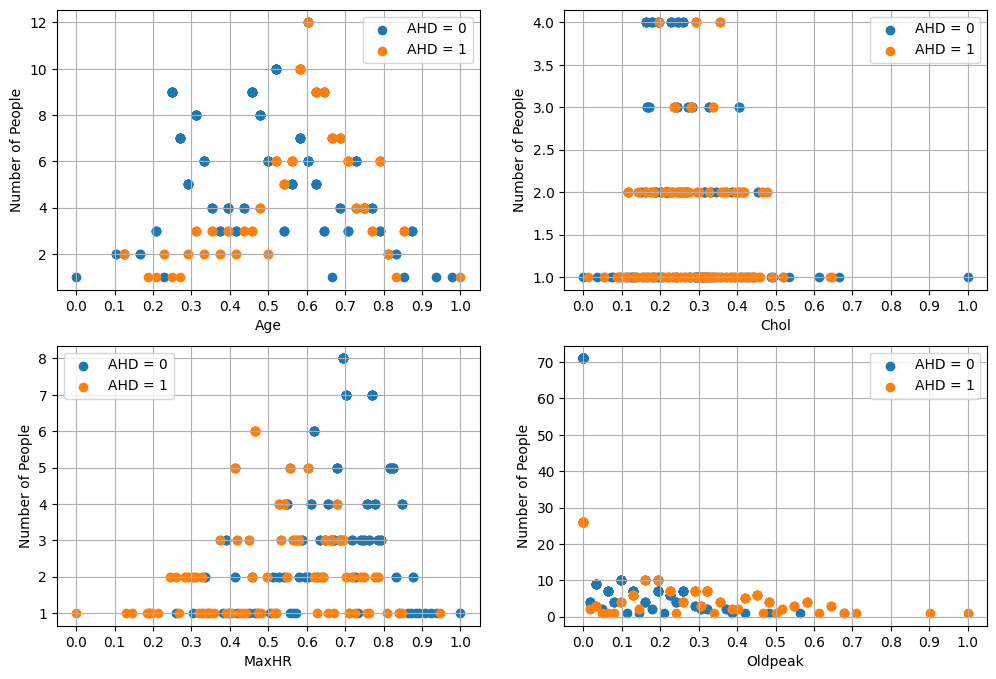

In [8]:
plot = plt.figure(figsize=(12, 8))

for i, col in enumerate(["Age", "Chol", "MaxHR", "Oldpeak"], start=1):
    plt.subplot(2, 2, i)

    col0 = list(df[df["Target"] == 0][col])
    col1 = list(df[df["Target"] == 1][col])
    plt.scatter(col0, [col0.count(i) for i in col0], label="AHD = 0")
    plt.scatter(col1, [col1.count(i) for i in col1], label="AHD = 1")
    plt.xlabel(col)

    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.ylabel("Number of People")
    plt.grid(True)
    plt.legend()

plt.show()

## **Train-Test Split**

Since the test set is not provided, the training set is split into test sets using a randomized 80-20 split.

In [9]:
# Shuffle the data
train_size: int = int(0.8 * df.shape[0])
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing
x_train: np.ndarray = df.iloc[:train_size, :-1].values
y_train: np.ndarray = df.iloc[:train_size, -1].values
x_test: np.ndarray = df.iloc[train_size:, :-1].values
y_test: np.ndarray = df.iloc[train_size:, -1].values

### **Perform Logistic Regression**

Having preprocessed and analysed the data, we now perform logistic regression on the data.
The data is classified into binary clusters using `LogisticRegression` implemented in `utils.py`. 

The accuracy of the model is also calculated.

In [10]:
# Train the model for the data
model = LogisticRegression(x_train, y_train, alpha=1e-3, tol=1e-4, max_iters=1e+7)
model.train()

# Calculate the accuracy
print(f"Accuracy: {model.accuracy(x_test, y_test) * 100}%")

Accuracy: 90.0%


### **Dimensionality Reduction using FDA**

A copy of the training and testing data is made and the dimensionality of the data is reduced using `FDA` implemented in `utils.py`. 

Logistic Regression is applied on the reduced data and the accuracy is calculated again.

In [11]:
# Fit the training data using FDA
trainer = FDA(x_train, y_train)
fda_train = trainer.transform()
print("Transformed Training Data using FDA")

# Fit the testing data using FDA
tester = FDA(x_test, y_test)
fda_test = tester.transform()
print("Transformed Testing Data using FDA")

Transformed Training Data using FDA
Transformed Testing Data using FDA


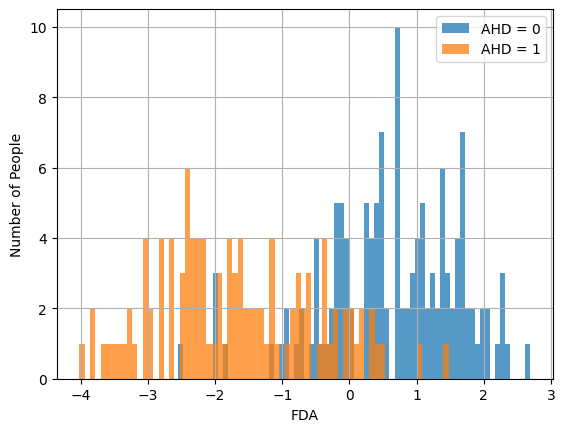

In [12]:
# Plot the data
plt.hist(fda_train[y_train == 0], label="AHD = 0", alpha=0.75, bins=70)
plt.hist(fda_train[y_train == 1], label="AHD = 1", alpha=0.75, bins=70)
plt.xlabel("FDA")
plt.ylabel("Number of People")
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# Train the model for the data
fda_train = fda_train.reshape(-1, 1)
model = LogisticRegression(fda_train, y_train, alpha=1e-3, tol=1e-4, max_iters=1e+7)
model.train()

# Calculate the accuracy
fda_test = fda_test.reshape(-1, 1)
print(f"Accuracy: {model.accuracy(fda_test, y_test) * 100}%")

Accuracy: 71.66666666666667%


### **Dimensionality Reduction using PCA and FDA**

A copy of the training and testing data is made and the dimensionality of the data is reduced using the PCA algorithm. This data is then reduced using FDA, as above. 

Logistic Regression is applied on the reduced data and the accuracy is calculated again.

In [14]:
# Create PCAs for 5, 10, and 15 dimensions
pca05 = PCA(n_components=5)
pca10 = PCA(n_components=10)
pca15 = PCA(n_components=15)

# Fit the training data in 5, 10, and 15 dimensions
pca05.fit(x_train)
x_train05 = pca05.transform(x_train)

pca10.fit(x_train)
x_train10 = pca10.transform(x_train)

pca15.fit(x_train)
x_train15 = pca15.transform(x_train)

print("Transformed Training Data in 5, 10, and 15 dimensions")

# Fit the testing data in 5, 10, and 15 dimensions
x_test05 = pca05.transform(x_test)
x_test10 = pca10.transform(x_test)
x_test15 = pca15.transform(x_test)

print("Transformed Testing Data in 5, 10, and 15 dimensions")

Transformed Training Data in 5, 10, and 15 dimensions
Transformed Testing Data in 5, 10, and 15 dimensions


In [15]:
# Fit the training data using FDA
trainer05 = FDA(x_train05, y_train)
fda_train05 = trainer05.transform()

trainer10 = FDA(x_train10, y_train)
fda_train10 = trainer10.transform()

trainer15 = FDA(x_train15, y_train)
fda_train15 = trainer15.transform()

print("Transformed Training Data using FDA")

# Fit the testing data using FDA
tester05 = FDA(x_test05, y_test)
fda_test05 = tester05.transform()

tester10 = FDA(x_test10, y_test)
fda_test10 = tester10.transform()

tester15 = FDA(x_test15, y_test)
fda_test15 = tester15.transform()

print("Transformed Testing Data using FDA")

Transformed Training Data using FDA
Transformed Testing Data using FDA


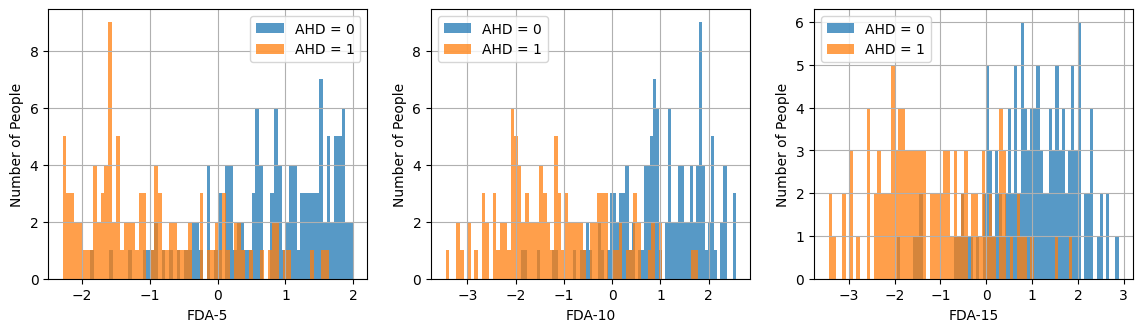

In [16]:
# Plot the data
plt.figure(figsize=(14, 3.5))

plt.subplot(1, 3, 1)
plt.hist(fda_train05[y_train == 0], label="AHD = 0", alpha=0.75, bins=70)
plt.hist(fda_train05[y_train == 1], label="AHD = 1", alpha=0.75, bins=70)
plt.xlabel("FDA-5")
plt.ylabel("Number of People")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(fda_train10[y_train == 0], label="AHD = 0", alpha=0.75, bins=70)
plt.hist(fda_train10[y_train == 1], label="AHD = 1", alpha=0.75, bins=70)
plt.xlabel("FDA-10")
plt.ylabel("Number of People")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(fda_train15[y_train == 0], label="AHD = 0", alpha=0.75, bins=70)
plt.hist(fda_train15[y_train == 1], label="AHD = 1", alpha=0.75, bins=70)
plt.xlabel("FDA-15")
plt.ylabel("Number of People")
plt.grid(True)
plt.legend()

plt.show()

In [17]:
# Reshape Training Data
fda_train05 = fda_train05.reshape(-1, 1)
fda_train10 = fda_train10.reshape(-1, 1)
fda_train15 = fda_train15.reshape(-1, 1)

# Train the model for the data
model05 = LogisticRegression(fda_train05, y_train, alpha=1e-3, tol=1e-4, max_iters=1e+7)
model10 = LogisticRegression(fda_train10, y_train, alpha=1e-3, tol=1e-4, max_iters=1e+7)
model15 = LogisticRegression(fda_train15, y_train, alpha=1e-3, tol=1e-4, max_iters=1e+7)

model05.train()
model10.train()
model15.train()

# Reshape Testing Data
fda_test05 = fda_test05.reshape(-1, 1)
fda_test10 = fda_test10.reshape(-1, 1)
fda_test15 = fda_test15.reshape(-1, 1)

# Calculate the accuracy
print(f"Accuracy (PCA-05 + FDA): {model05.accuracy(fda_test05, y_test) * 100}%")
print(f"Accuracy (PCA-10 + FDA): {model10.accuracy(fda_test10, y_test) * 100}%")
print(f"Accuracy (PCA-15 + FDA): {model15.accuracy(fda_test15, y_test) * 100}%")


Accuracy (PCA-05 + FDA): 86.66666666666667%
Accuracy (PCA-10 + FDA): 93.33333333333333%
Accuracy (PCA-15 + FDA): 93.33333333333333%
